In [1]:
import os
import numpy as np
import pandas as pd
x = pd.read_excel ('data_train.xlsx')
test=pd.read_excel('data_test.xlsx')
print(test.columns)

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')


In [2]:
y=x.pop('Price')
x.describe()

,Year,Kilometers_Driven,Seats
count,6019.000000,6.019000e+03,5977.000000
mean,2013.358199,5.873838e+04,5.278735
std,3.269742,9.126884e+04,0.808840
min,1998.000000,1.710000e+02,0.000000
25%,2011.000000,3.400000e+04,5.000000
50%,2014.000000,5.300000e+04,5.000000
75%,2016.000000,7.300000e+04,5.000000
max,2019.000000,6.500000e+06,10.000000


In [3]:
x['Name'] = x.Name.str.split().str.get(0)
test['Name'] = test.Name.str.split().str.get(0)

In [4]:
x.isna().sum()


Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
dtype: int64

In [5]:
x['Seats'].fillna(x['Seats'].mean(),inplace=True)
test['Seats'].fillna(test['Seats'].mean(),inplace=True)
data = pd.concat([x,test], sort=False)
x['Mileage'] = x['Mileage'].fillna('17.0 kmpl')
test['Mileage'] = test['Mileage'].fillna('17.0 kmpl')
x['Mileage'] = x['Mileage'].replace("0.0 kmpl", "17.0 kmpl")
test['Mileage'] = test['Mileage'].replace("0.0 kmpl", "17.0 kmpl")
x['Engine'] = x['Engine'].fillna('1197 CC')
test['Engine'] = test['Engine'].fillna('1197 CC')
x['Power'] = x['Power'].fillna('74 bhp')
test['Power'] = test['Power'].fillna('74 bhp')
x['Power'] = x['Power'].replace("null bhp", "74 bhp")
test['Power'] = test['Power'].replace("null bhp", "74 bhp")

In [6]:

print(x.columns)
print(x.isna().sum())

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64


In [7]:
print(x.Name.unique())
print(x.Fuel_Type.unique())
print(x.Transmission.unique())
print(x.Owner_Type.unique())
print(x.Location.unique())


['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


In [8]:
print(x.columns)

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')


In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null object
Engine               6019 non-null object
Power                6019 non-null object
Seats                6019 non-null float64
dtypes: float64(1), int64(2), object(8)
memory usage: 517.3+ KB


In [10]:
import re

def get_number(name):
    title_search = re.search('([\d+\.+\d]+\W)', name)
    5
    if title_search:
        return title_search.group(1)
    return ""

x['Mileage'] = x['Mileage'].apply(get_number).astype('float')
x['Engine'] = x['Engine'].apply(get_number).astype('int')
x['Power'] = x['Power'].apply(get_number).astype('float')

test['Mileage'] = test['Mileage'].apply(get_number).astype('float')
test['Engine'] = test['Engine'].apply(get_number).astype('int')
test['Power'] = test['Power'].apply(get_number).astype('float')

In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null float64
Engine               6019 non-null int32
Power                6019 non-null float64
Seats                6019 non-null float64
dtypes: float64(3), int32(1), int64(2), object(5)
memory usage: 493.8+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x['Name'] = label_encoder.fit_transform(x['Name'])
x['Location'] = label_encoder.fit_transform(x['Location'])
x['Fuel_Type'] = label_encoder.fit_transform(x['Fuel_Type'])
x['Transmission'] = label_encoder.fit_transform(x['Transmission'])
x['Owner_Type'] = label_encoder.fit_transform(x['Owner_Type'])


In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
Name                 6019 non-null int32
Location             6019 non-null int32
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null int32
Transmission         6019 non-null int32
Owner_Type           6019 non-null int32
Mileage              6019 non-null float64
Engine               6019 non-null int32
Power                6019 non-null float64
Seats                6019 non-null float64
dtypes: float64(3), int32(6), int64(2)
memory usage: 376.3 KB


In [14]:

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4815 entries, 3509 to 2732
Data columns (total 11 columns):
Name                 4815 non-null int32
Location             4815 non-null int32
Year                 4815 non-null int64
Kilometers_Driven    4815 non-null int64
Fuel_Type            4815 non-null int32
Transmission         4815 non-null int32
Owner_Type           4815 non-null int32
Mileage              4815 non-null float64
Engine               4815 non-null int32
Power                4815 non-null float64
Seats                4815 non-null float64
dtypes: float64(3), int32(6), int64(2)
memory usage: 338.6 KB


In [16]:
X_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
3509,10,3,2017,24153,1,1,2,22.54,1396,88.73,5.0
3332,17,9,2013,35000,1,1,0,17.21,1493,100.00,7.0
5383,27,5,2005,92000,1,1,2,16.10,1405,70.00,5.0
1891,18,4,2014,62000,1,1,0,17.80,1248,75.00,5.0
5757,28,8,2017,31000,1,1,0,13.68,2393,147.80,7.0


In [17]:
import keras
from keras import layers
import tensorflow as tf
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

Using TensorFlow backend.


In [18]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [19]:
EPOCHS = 1000
history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=1)

Train on 3852 samples, validate on 963 samples
Epoch 1/1000
3852/3852 [==============================] - 0s 60us/step - loss: 9588325.3383 - mae: 452.7654 - mse: 9588328.0000 - val_loss: 1958.1527 - val_mae: 40.4289 - val_mse: 1958.1530
Epoch 2/1000
3852/3852 [==============================] - 0s 47us/step - loss: 3068204.7725 - mae: 513.9628 - mse: 3068205.7500 - val_loss: 1396092.0084 - val_mae: 1043.1389 - val_mse: 1396092.1250
Epoch 3/1000
3852/3852 [==============================] - 0s 42us/step - loss: 653522.8796 - mae: 387.6434 - mse: 653523.0000 - val_loss: 4314.9918 - val_mae: 50.2675 - val_mse: 4314.9917
Epoch 4/1000
3852/3852 [==============================] - 0s 50us/step - loss: 427580.4953 - mae: 260.9801 - mse: 427580.3750 - val_loss: 1486.0352 - val_mae: 31.8495 - val_mse: 1486.0350
Epoch 5/1000
3852/3852 [==============================] - 0s 44us/step - loss: 1074186.5983 - mae: 376.8007 - mse: 1074186.6250 - val_loss: 69473.1674 - val_mae: 226.3296 - val_mse: 69473.1

Epoch 44/1000
3852/3852 [==============================] - 0s 35us/step - loss: 92475.4565 - mae: 126.4383 - mse: 92475.4531 - val_loss: 232645.4072 - val_mae: 426.4183 - val_mse: 232645.3906
Epoch 45/1000
3852/3852 [==============================] - 0s 33us/step - loss: 139041.8433 - mae: 160.3124 - mse: 139041.8750 - val_loss: 4280.5768 - val_mae: 51.4629 - val_mse: 4280.5767
Epoch 46/1000
3852/3852 [==============================] - 0s 43us/step - loss: 58972.0128 - mae: 122.8606 - mse: 58972.0000 - val_loss: 2591.1632 - val_mae: 41.8059 - val_mse: 2591.1631
Epoch 47/1000
3852/3852 [==============================] - 0s 40us/step - loss: 201365.4392 - mae: 170.9611 - mse: 201365.4688 - val_loss: 16423.8186 - val_mae: 108.6781 - val_mse: 16423.8184
Epoch 48/1000
3852/3852 [==============================] - 0s 35us/step - loss: 102371.7171 - mae: 144.9473 - mse: 102371.7266 - val_loss: 6583.5744 - val_mae: 65.0491 - val_mse: 6583.5752
Epoch 49/1000
3852/3852 [==========================

3852/3852 [==============================] - 0s 34us/step - loss: 54.4377 - mae: 4.5473 - mse: 54.4377 - val_loss: 139.9242 - val_mae: 9.9213 - val_mse: 139.9242
Epoch 90/1000
3852/3852 [==============================] - 0s 33us/step - loss: 56.7151 - mae: 4.4222 - mse: 56.7151 - val_loss: 42.6168 - val_mae: 4.0204 - val_mse: 42.6168
Epoch 91/1000
3852/3852 [==============================] - 0s 34us/step - loss: 55.7396 - mae: 4.4293 - mse: 55.7396 - val_loss: 47.1753 - val_mae: 4.6557 - val_mse: 47.1753
Epoch 92/1000
3852/3852 [==============================] - 0s 34us/step - loss: 69.1220 - mae: 4.3824 - mse: 69.1220 - val_loss: 45.2389 - val_mae: 4.1205 - val_mse: 45.2389
Epoch 93/1000
3852/3852 [==============================] - 0s 34us/step - loss: 56.5104 - mae: 4.4456 - mse: 56.5104 - val_loss: 43.1336 - val_mae: 4.1318 - val_mse: 43.1336
Epoch 94/1000
3852/3852 [==============================] - 0s 34us/step - loss: 55.0462 - mae: 4.4310 - mse: 55.0462 - val_loss: 61.3390 - val

Epoch 136/1000
3852/3852 [==============================] - 0s 35us/step - loss: 48.3942 - mae: 4.0306 - mse: 48.3942 - val_loss: 61.4223 - val_mae: 6.1466 - val_mse: 61.4223
Epoch 137/1000
3852/3852 [==============================] - 0s 34us/step - loss: 46.6923 - mae: 3.8677 - mse: 46.6923 - val_loss: 39.9444 - val_mae: 3.7383 - val_mse: 39.9444
Epoch 138/1000
3852/3852 [==============================] - 0s 35us/step - loss: 47.3766 - mae: 4.0031 - mse: 47.3766 - val_loss: 35.3880 - val_mae: 3.7922 - val_mse: 35.3880
Epoch 139/1000
3852/3852 [==============================] - 0s 34us/step - loss: 47.1871 - mae: 3.9495 - mse: 47.1871 - val_loss: 38.2285 - val_mae: 3.7565 - val_mse: 38.2285
Epoch 140/1000
3852/3852 [==============================] - 0s 34us/step - loss: 46.6314 - mae: 3.9316 - mse: 46.6314 - val_loss: 33.9842 - val_mae: 3.4766 - val_mse: 33.9842
Epoch 141/1000
3852/3852 [==============================] - 0s 34us/step - loss: 47.2650 - mae: 3.9686 - mse: 47.2650 - val_l

Epoch 183/1000
3852/3852 [==============================] - 0s 35us/step - loss: 43.9008 - mae: 3.7269 - mse: 43.9008 - val_loss: 95.2209 - val_mae: 7.9881 - val_mse: 95.2209
Epoch 184/1000
3852/3852 [==============================] - 0s 43us/step - loss: 45.3661 - mae: 3.8308 - mse: 45.3662 - val_loss: 35.5409 - val_mae: 3.5538 - val_mse: 35.5409
Epoch 185/1000
3852/3852 [==============================] - 0s 40us/step - loss: 43.2708 - mae: 3.7588 - mse: 43.2708 - val_loss: 47.4075 - val_mae: 4.3623 - val_mse: 47.4076
Epoch 186/1000
3852/3852 [==============================] - 0s 51us/step - loss: 44.3119 - mae: 3.8528 - mse: 44.3119 - val_loss: 32.7409 - val_mae: 3.3889 - val_mse: 32.7409
Epoch 187/1000
3852/3852 [==============================] - 0s 36us/step - loss: 43.6644 - mae: 3.6781 - mse: 43.6644 - val_loss: 36.0940 - val_mae: 4.0730 - val_mse: 36.0940
Epoch 188/1000
3852/3852 [==============================] - 0s 38us/step - loss: 47.1573 - mae: 3.9574 - mse: 47.1573 - val_l

Epoch 230/1000
3852/3852 [==============================] - 0s 43us/step - loss: 41.9988 - mae: 3.6996 - mse: 41.9988 - val_loss: 40.7000 - val_mae: 4.1993 - val_mse: 40.7000
Epoch 231/1000
3852/3852 [==============================] - 0s 52us/step - loss: 42.2055 - mae: 3.6683 - mse: 42.2054 - val_loss: 66.9978 - val_mae: 6.3916 - val_mse: 66.9978
Epoch 232/1000
3852/3852 [==============================] - 0s 54us/step - loss: 41.3358 - mae: 3.6228 - mse: 41.3358 - val_loss: 29.8310 - val_mae: 3.2696 - val_mse: 29.8310
Epoch 233/1000
3852/3852 [==============================] - 0s 60us/step - loss: 43.1368 - mae: 3.8391 - mse: 43.1368 - val_loss: 53.4666 - val_mae: 5.2452 - val_mse: 53.4666
Epoch 234/1000
3852/3852 [==============================] - 0s 52us/step - loss: 41.6750 - mae: 3.6682 - mse: 41.6750 - val_loss: 35.3498 - val_mae: 3.5116 - val_mse: 35.3498
Epoch 235/1000
3852/3852 [==============================] - 0s 42us/step - loss: 41.3339 - mae: 3.7776 - mse: 41.3339 - val_l

3852/3852 [==============================] - 0s 69us/step - loss: 39.8786 - mae: 3.6475 - mse: 39.8786 - val_loss: 33.0026 - val_mae: 3.6801 - val_mse: 33.0026
Epoch 277/1000
3852/3852 [==============================] - 0s 70us/step - loss: 39.4824 - mae: 3.6286 - mse: 39.4824 - val_loss: 33.4281 - val_mae: 3.4030 - val_mse: 33.4281
Epoch 278/1000
3852/3852 [==============================] - 0s 73us/step - loss: 40.6966 - mae: 3.5642 - mse: 40.6966 - val_loss: 43.5608 - val_mae: 4.0858 - val_mse: 43.5608
Epoch 279/1000
3852/3852 [==============================] - 0s 73us/step - loss: 40.9113 - mae: 3.5804 - mse: 40.9113 - val_loss: 33.9117 - val_mae: 3.8443 - val_mse: 33.9117
Epoch 280/1000
3852/3852 [==============================] - 0s 69us/step - loss: 41.9463 - mae: 3.6298 - mse: 41.9463 - val_loss: 42.8898 - val_mae: 4.0348 - val_mse: 42.8898
Epoch 281/1000
3852/3852 [==============================] - 0s 70us/step - loss: 40.6924 - mae: 3.5044 - mse: 40.6924 - val_loss: 38.5943 - 

Epoch 323/1000
3852/3852 [==============================] - 0s 34us/step - loss: 40.2084 - mae: 3.5504 - mse: 40.2084 - val_loss: 35.4219 - val_mae: 3.4045 - val_mse: 35.4219
Epoch 324/1000
3852/3852 [==============================] - 0s 35us/step - loss: 40.9883 - mae: 3.5907 - mse: 40.9883 - val_loss: 33.7362 - val_mae: 3.6552 - val_mse: 33.7362
Epoch 325/1000
3852/3852 [==============================] - 0s 34us/step - loss: 40.6341 - mae: 3.6098 - mse: 40.6341 - val_loss: 29.0350 - val_mae: 3.2028 - val_mse: 29.0350
Epoch 326/1000
3852/3852 [==============================] - 0s 34us/step - loss: 39.3497 - mae: 3.4765 - mse: 39.3497 - val_loss: 43.3601 - val_mae: 4.4155 - val_mse: 43.3601
Epoch 327/1000
3852/3852 [==============================] - 0s 35us/step - loss: 39.6471 - mae: 3.5317 - mse: 39.6471 - val_loss: 35.1895 - val_mae: 3.5441 - val_mse: 35.1895
Epoch 328/1000
3852/3852 [==============================] - 0s 34us/step - loss: 41.0117 - mae: 3.5427 - mse: 41.0118 - val_l

Epoch 370/1000
3852/3852 [==============================] - 0s 36us/step - loss: 38.8440 - mae: 3.5660 - mse: 38.8440 - val_loss: 29.0954 - val_mae: 3.2282 - val_mse: 29.0954
Epoch 371/1000
3852/3852 [==============================] - 0s 34us/step - loss: 39.4073 - mae: 3.5150 - mse: 39.4073 - val_loss: 30.9755 - val_mae: 3.4242 - val_mse: 30.9755
Epoch 372/1000
3852/3852 [==============================] - 0s 34us/step - loss: 54.7120 - mae: 3.5154 - mse: 54.7120 - val_loss: 28.1775 - val_mae: 3.2362 - val_mse: 28.1775
Epoch 373/1000
3852/3852 [==============================] - 0s 33us/step - loss: 40.1089 - mae: 3.5546 - mse: 40.1089 - val_loss: 31.1335 - val_mae: 3.2555 - val_mse: 31.1335
Epoch 374/1000
3852/3852 [==============================] - 0s 33us/step - loss: 37.3355 - mae: 3.4513 - mse: 37.3355 - val_loss: 41.0784 - val_mae: 3.7617 - val_mse: 41.0784
Epoch 375/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.8452 - mae: 3.5125 - mse: 37.8452 - val_l

Epoch 417/1000
3852/3852 [==============================] - 0s 33us/step - loss: 39.1439 - mae: 3.5014 - mse: 39.1439 - val_loss: 32.8138 - val_mae: 3.4372 - val_mse: 32.8138
Epoch 418/1000
3852/3852 [==============================] - 0s 33us/step - loss: 38.2146 - mae: 3.4532 - mse: 38.2146 - val_loss: 54.6527 - val_mae: 4.2840 - val_mse: 54.6527
Epoch 419/1000
3852/3852 [==============================] - 0s 33us/step - loss: 37.6464 - mae: 3.4345 - mse: 37.6465 - val_loss: 34.7774 - val_mae: 3.8408 - val_mse: 34.7774
Epoch 420/1000
3852/3852 [==============================] - 0s 34us/step - loss: 38.1177 - mae: 3.4140 - mse: 38.1176 - val_loss: 69.5849 - val_mae: 6.6253 - val_mse: 69.5849
Epoch 421/1000
3852/3852 [==============================] - 0s 35us/step - loss: 38.3140 - mae: 3.5027 - mse: 38.3140 - val_loss: 44.5650 - val_mae: 4.7264 - val_mse: 44.5650
Epoch 422/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.9456 - mae: 3.4430 - mse: 37.9456 - val_l

Epoch 464/1000
3852/3852 [==============================] - 0s 33us/step - loss: 38.4721 - mae: 3.4475 - mse: 38.4721 - val_loss: 34.9336 - val_mae: 3.8601 - val_mse: 34.9336
Epoch 465/1000
3852/3852 [==============================] - 0s 33us/step - loss: 38.7081 - mae: 3.4735 - mse: 38.7081 - val_loss: 33.1623 - val_mae: 3.5725 - val_mse: 33.1623
Epoch 466/1000
3852/3852 [==============================] - 0s 34us/step - loss: 39.9351 - mae: 3.5514 - mse: 39.9351 - val_loss: 38.0881 - val_mae: 3.4788 - val_mse: 38.0881
Epoch 467/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.7037 - mae: 3.3835 - mse: 37.7037 - val_loss: 37.0120 - val_mae: 3.6501 - val_mse: 37.0120
Epoch 468/1000
3852/3852 [==============================] - 0s 33us/step - loss: 37.9238 - mae: 3.4116 - mse: 37.9238 - val_loss: 30.3624 - val_mae: 3.3643 - val_mse: 30.3624
Epoch 469/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.5402 - mae: 3.4415 - mse: 37.5402 - val_l

Epoch 511/1000
3852/3852 [==============================] - 0s 34us/step - loss: 36.9964 - mae: 3.3802 - mse: 36.9964 - val_loss: 35.2208 - val_mae: 3.7894 - val_mse: 35.2208
Epoch 512/1000
3852/3852 [==============================] - 0s 33us/step - loss: 37.9154 - mae: 3.4846 - mse: 37.9154 - val_loss: 36.9226 - val_mae: 3.7412 - val_mse: 36.9226
Epoch 513/1000
3852/3852 [==============================] - 0s 34us/step - loss: 36.9838 - mae: 3.4323 - mse: 36.9838 - val_loss: 32.0955 - val_mae: 3.4000 - val_mse: 32.0955
Epoch 514/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.9100 - mae: 3.4277 - mse: 37.9100 - val_loss: 28.1436 - val_mae: 3.2769 - val_mse: 28.1436
Epoch 515/1000
3852/3852 [==============================] - 0s 32us/step - loss: 38.3423 - mae: 3.5383 - mse: 38.3423 - val_loss: 31.9899 - val_mae: 3.3241 - val_mse: 31.9899
Epoch 516/1000
3852/3852 [==============================] - 0s 34us/step - loss: 38.3014 - mae: 3.4694 - mse: 38.3013 - val_l

Epoch 558/1000
3852/3852 [==============================] - 0s 33us/step - loss: 37.7925 - mae: 3.4630 - mse: 37.7925 - val_loss: 27.4454 - val_mae: 3.1597 - val_mse: 27.4454
Epoch 559/1000
3852/3852 [==============================] - 0s 33us/step - loss: 37.8433 - mae: 3.4825 - mse: 37.8433 - val_loss: 33.2026 - val_mae: 3.4683 - val_mse: 33.2026
Epoch 560/1000
3852/3852 [==============================] - 0s 35us/step - loss: 36.9979 - mae: 3.3919 - mse: 36.9979 - val_loss: 40.2846 - val_mae: 3.7655 - val_mse: 40.2846
Epoch 561/1000
3852/3852 [==============================] - 0s 34us/step - loss: 39.2619 - mae: 3.4952 - mse: 39.2619 - val_loss: 31.2717 - val_mae: 3.4794 - val_mse: 31.2717
Epoch 562/1000
3852/3852 [==============================] - 0s 34us/step - loss: 38.6909 - mae: 3.4594 - mse: 38.6910 - val_loss: 35.2795 - val_mae: 3.6672 - val_mse: 35.2795
Epoch 563/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.0559 - mae: 3.4303 - mse: 37.0559 - val_l

Epoch 605/1000
3852/3852 [==============================] - 0s 35us/step - loss: 37.9204 - mae: 3.4021 - mse: 37.9204 - val_loss: 28.0755 - val_mae: 3.2821 - val_mse: 28.0755
Epoch 606/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.5796 - mae: 3.4308 - mse: 37.5796 - val_loss: 42.9596 - val_mae: 4.9584 - val_mse: 42.9596
Epoch 607/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.4305 - mae: 3.3708 - mse: 37.4305 - val_loss: 27.4979 - val_mae: 3.2422 - val_mse: 27.4979
Epoch 608/1000
3852/3852 [==============================] - 0s 34us/step - loss: 36.2142 - mae: 3.3947 - mse: 36.2142 - val_loss: 28.9589 - val_mae: 3.2622 - val_mse: 28.9589
Epoch 609/1000
3852/3852 [==============================] - 0s 35us/step - loss: 38.1159 - mae: 3.4719 - mse: 38.1159 - val_loss: 38.1770 - val_mae: 3.8618 - val_mse: 38.1770
Epoch 610/1000
3852/3852 [==============================] - 0s 35us/step - loss: 36.8038 - mae: 3.3965 - mse: 36.8038 - val_l

Epoch 652/1000
3852/3852 [==============================] - 0s 34us/step - loss: 36.2657 - mae: 3.3828 - mse: 36.2657 - val_loss: 27.4736 - val_mae: 3.2196 - val_mse: 27.4736
Epoch 653/1000
3852/3852 [==============================] - 0s 34us/step - loss: 36.9097 - mae: 3.3797 - mse: 36.9097 - val_loss: 35.8738 - val_mae: 3.9775 - val_mse: 35.8738
Epoch 654/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.3137 - mae: 3.3396 - mse: 37.3137 - val_loss: 27.3246 - val_mae: 3.1746 - val_mse: 27.3246
Epoch 655/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.2219 - mae: 3.4150 - mse: 37.2219 - val_loss: 40.5806 - val_mae: 3.9156 - val_mse: 40.5806
Epoch 656/1000
3852/3852 [==============================] - 0s 35us/step - loss: 37.7174 - mae: 3.4043 - mse: 37.7174 - val_loss: 29.1770 - val_mae: 3.2526 - val_mse: 29.1770
Epoch 657/1000
3852/3852 [==============================] - 0s 35us/step - loss: 36.7358 - mae: 3.3364 - mse: 36.7358 - val_l

Epoch 699/1000
3852/3852 [==============================] - 0s 35us/step - loss: 36.7477 - mae: 3.3638 - mse: 36.7477 - val_loss: 37.6338 - val_mae: 4.0675 - val_mse: 37.6338
Epoch 700/1000
3852/3852 [==============================] - 0s 34us/step - loss: 36.5909 - mae: 3.3603 - mse: 36.5909 - val_loss: 63.4949 - val_mae: 5.6820 - val_mse: 63.4949
Epoch 701/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.5842 - mae: 3.3902 - mse: 37.5842 - val_loss: 35.7809 - val_mae: 3.7015 - val_mse: 35.7809
Epoch 702/1000
3852/3852 [==============================] - 0s 33us/step - loss: 37.5931 - mae: 3.4154 - mse: 37.5931 - val_loss: 29.0762 - val_mae: 3.2872 - val_mse: 29.0762
Epoch 703/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.9388 - mae: 3.4255 - mse: 37.9388 - val_loss: 30.0987 - val_mae: 3.3731 - val_mse: 30.0988
Epoch 704/1000
3852/3852 [==============================] - 0s 35us/step - loss: 36.9109 - mae: 3.3894 - mse: 36.9109 - val_l

Epoch 746/1000
3852/3852 [==============================] - 0s 34us/step - loss: 38.3777 - mae: 3.4329 - mse: 38.3777 - val_loss: 35.2835 - val_mae: 3.4979 - val_mse: 35.2835
Epoch 747/1000
3852/3852 [==============================] - 0s 34us/step - loss: 38.0625 - mae: 3.4078 - mse: 38.0625 - val_loss: 41.8286 - val_mae: 3.8305 - val_mse: 41.8286
Epoch 748/1000
3852/3852 [==============================] - 0s 35us/step - loss: 37.6314 - mae: 3.3411 - mse: 37.6314 - val_loss: 31.0779 - val_mae: 3.2872 - val_mse: 31.0779
Epoch 749/1000
3852/3852 [==============================] - 0s 34us/step - loss: 36.5021 - mae: 3.3736 - mse: 36.5021 - val_loss: 28.2139 - val_mae: 3.2205 - val_mse: 28.2139
Epoch 750/1000
3852/3852 [==============================] - 0s 34us/step - loss: 36.9661 - mae: 3.3483 - mse: 36.9661 - val_loss: 36.0761 - val_mae: 3.5906 - val_mse: 36.0761
Epoch 751/1000
3852/3852 [==============================] - 0s 34us/step - loss: 36.4411 - mae: 3.3068 - mse: 36.4411 - val_l

Epoch 793/1000
3852/3852 [==============================] - 0s 34us/step - loss: 35.9836 - mae: 3.3736 - mse: 35.9836 - val_loss: 33.7080 - val_mae: 3.4923 - val_mse: 33.7080
Epoch 794/1000
3852/3852 [==============================] - 0s 35us/step - loss: 36.3344 - mae: 3.3484 - mse: 36.3344 - val_loss: 42.1042 - val_mae: 4.2005 - val_mse: 42.1042
Epoch 795/1000
3852/3852 [==============================] - 0s 33us/step - loss: 36.7344 - mae: 3.3560 - mse: 36.7344 - val_loss: 36.2184 - val_mae: 3.5452 - val_mse: 36.2184
Epoch 796/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.4448 - mae: 3.3187 - mse: 37.4448 - val_loss: 95.4506 - val_mae: 7.6280 - val_mse: 95.4506
Epoch 797/1000
3852/3852 [==============================] - 0s 33us/step - loss: 37.1166 - mae: 3.3809 - mse: 37.1166 - val_loss: 27.4809 - val_mae: 3.1514 - val_mse: 27.4809
Epoch 798/1000
3852/3852 [==============================] - 0s 34us/step - loss: 36.2614 - mae: 3.3227 - mse: 36.2614 - val_l

Epoch 840/1000
3852/3852 [==============================] - 0s 34us/step - loss: 35.8634 - mae: 3.3434 - mse: 35.8634 - val_loss: 32.3687 - val_mae: 3.3047 - val_mse: 32.3687
Epoch 841/1000
3852/3852 [==============================] - 0s 34us/step - loss: 36.5508 - mae: 3.3577 - mse: 36.5508 - val_loss: 30.1747 - val_mae: 3.3760 - val_mse: 30.1747
Epoch 842/1000
3852/3852 [==============================] - 0s 33us/step - loss: 38.0970 - mae: 3.3924 - mse: 38.0970 - val_loss: 28.5575 - val_mae: 3.2509 - val_mse: 28.5575
Epoch 843/1000
3852/3852 [==============================] - 0s 33us/step - loss: 37.0496 - mae: 3.3624 - mse: 37.0496 - val_loss: 31.6462 - val_mae: 3.4319 - val_mse: 31.6462
Epoch 844/1000
3852/3852 [==============================] - 0s 33us/step - loss: 37.3713 - mae: 3.4168 - mse: 37.3713 - val_loss: 34.4447 - val_mae: 3.4135 - val_mse: 34.4447
Epoch 845/1000
3852/3852 [==============================] - 0s 34us/step - loss: 38.7418 - mae: 3.4540 - mse: 38.7418 - val_l

Epoch 887/1000
3852/3852 [==============================] - 0s 35us/step - loss: 37.5747 - mae: 3.4695 - mse: 37.5747 - val_loss: 29.8216 - val_mae: 3.2262 - val_mse: 29.8216
Epoch 888/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.2936 - mae: 3.3431 - mse: 37.2936 - val_loss: 36.2200 - val_mae: 3.5290 - val_mse: 36.2200
Epoch 889/1000
3852/3852 [==============================] - 0s 35us/step - loss: 37.2988 - mae: 3.3608 - mse: 37.2988 - val_loss: 30.1707 - val_mae: 3.3119 - val_mse: 30.1707
Epoch 890/1000
3852/3852 [==============================] - 0s 35us/step - loss: 37.4874 - mae: 3.3786 - mse: 37.4874 - val_loss: 32.6593 - val_mae: 3.4150 - val_mse: 32.6593
Epoch 891/1000
3852/3852 [==============================] - 0s 36us/step - loss: 35.7275 - mae: 3.3055 - mse: 35.7275 - val_loss: 30.1899 - val_mae: 3.2516 - val_mse: 30.1899
Epoch 892/1000
3852/3852 [==============================] - 0s 38us/step - loss: 37.3418 - mae: 3.3340 - mse: 37.3418 - val_l

Epoch 934/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.2624 - mae: 3.3860 - mse: 37.2624 - val_loss: 39.5714 - val_mae: 3.5660 - val_mse: 39.5714
Epoch 935/1000
3852/3852 [==============================] - 0s 34us/step - loss: 36.4809 - mae: 3.4155 - mse: 36.4809 - val_loss: 40.9367 - val_mae: 3.5081 - val_mse: 40.9367
Epoch 936/1000
3852/3852 [==============================] - 0s 33us/step - loss: 35.7117 - mae: 3.3518 - mse: 35.7117 - val_loss: 34.9575 - val_mae: 3.3381 - val_mse: 34.9575
Epoch 937/1000
3852/3852 [==============================] - 0s 34us/step - loss: 36.9458 - mae: 3.3906 - mse: 36.9458 - val_loss: 63.6006 - val_mae: 5.3806 - val_mse: 63.6006
Epoch 938/1000
3852/3852 [==============================] - 0s 34us/step - loss: 36.4282 - mae: 3.3740 - mse: 36.4282 - val_loss: 39.1080 - val_mae: 3.4334 - val_mse: 39.1080
Epoch 939/1000
3852/3852 [==============================] - 0s 34us/step - loss: 36.1952 - mae: 3.3561 - mse: 36.1952 - val_l

Epoch 981/1000
3852/3852 [==============================] - 0s 33us/step - loss: 39.4169 - mae: 3.4330 - mse: 39.4169 - val_loss: 59.8417 - val_mae: 4.1160 - val_mse: 59.8417
Epoch 982/1000
3852/3852 [==============================] - 0s 34us/step - loss: 38.8180 - mae: 3.4947 - mse: 38.8180 - val_loss: 42.1979 - val_mae: 3.4618 - val_mse: 42.1979
Epoch 983/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.9637 - mae: 3.4626 - mse: 37.9637 - val_loss: 63.6064 - val_mae: 4.4227 - val_mse: 63.6064
Epoch 984/1000
3852/3852 [==============================] - 0s 33us/step - loss: 40.2399 - mae: 3.5410 - mse: 40.2399 - val_loss: 37.4125 - val_mae: 3.3733 - val_mse: 37.4125
Epoch 985/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.1775 - mae: 3.3842 - mse: 37.1775 - val_loss: 40.4433 - val_mae: 3.6199 - val_mse: 40.4433
Epoch 986/1000
3852/3852 [==============================] - 0s 34us/step - loss: 37.8244 - mae: 3.3940 - mse: 37.8244 - val_l

In [20]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mae,val_mse,loss,mae,mse,epoch
995,45.809096,3.514379,45.809090,38.653640,3.477527,38.653641,995
996,46.112265,3.559802,46.112263,37.792872,3.438610,37.792866,996
997,42.642742,3.321034,42.642738,38.205910,3.507082,38.205902,997
998,39.565006,3.311915,39.565006,36.492062,3.368576,36.492069,998
999,38.316401,3.285467,38.316406,38.227504,3.386400,38.227501,999


In [21]:
#!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Prices]')

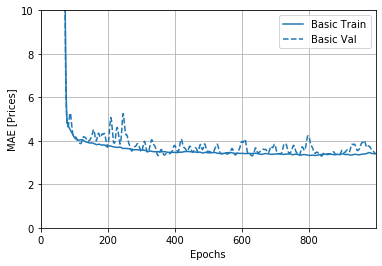

In [22]:
import matplotlib.pyplot as plt
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [Prices]')

In [23]:

test['Name'] = label_encoder.fit_transform(test['Name'])
test['Location'] = label_encoder.fit_transform(test['Location'])
test['Fuel_Type'] = label_encoder.fit_transform(test['Fuel_Type'])
test['Transmission'] = label_encoder.fit_transform(test['Transmission'])
test['Owner_Type'] = label_encoder.fit_transform(test['Owner_Type'])
test_predictions = model.predict(test).flatten()

In [24]:
testsave=pd.read_excel('data_test.xlsx')
testsave['Prices']=test_predictions

In [25]:
writer = pd.ExcelWriter('testpredictions.xlsx', engine='xlsxwriter')
testsave.to_excel(writer)
writer.save()